In [10]:
#python 使用决策树解决分类问题
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score,auc,confusion_matrix, f1_score, precision_score, recall_score,roc_curve
import prettytable
import pydotplus
import matplotlib.pyplot as plt

In [2]:
#数据准备
raw_data = np.loadtxt('classification.csv',delimiter=',',skiprows=1)
X = raw_data[:,:-1]
y = raw_data[:,-1]
#将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
#训练分类末模型
model_tree = tree.DecisionTreeClassifier(random_state=0)
model_tree.fit(X_train,y_train)
pre_y = model_tree.predict(X_test)

In [4]:
#输出模型概况
n_samples, n_features = X.shape
print('samples: %d \t features: %d' % (n_samples, n_features))
print(70 * '-')

samples: 21927 	 features: 4
----------------------------------------------------------------------


confusion matrix
+---------+---------+
| Field 1 | Field 2 |
+---------+---------+
|   5617  |   282   |
|   321   |   359   |
+---------+---------+
[[5617  282]
 [ 321  359]]


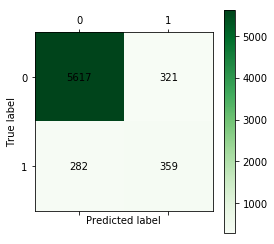

In [43]:
#混淆矩阵
confusion_m = confusion_matrix(y_test, pre_y)
confusion_matrix_table = prettytable.PrettyTable()
confusion_matrix_table.add_row(confusion_m[0,:])
confusion_matrix_table.add_row(confusion_m[1,:])
print('confusion matrix')
print(confusion_matrix_table)
print(confusion_m)
plt.matshow(confusion_m,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(confusion_m)):
    for y in range(len(confusion_m)):
        plt.annotate(confusion_m[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
plt.ylabel('True label')# 坐标轴标签
plt.xlabel('Predicted label')# 坐标轴标签
plt.show()

In [25]:
#核心评估指标
y_score = model_tree.predict_proba(X_test)
#获得决策树的预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])#ROC
auc_s = auc(fpr, tpr) #AUC
accuracy_s = accuracy_score(y_test, pre_y)
precision_s = precision_score(y_test, pre_y)
recall_s = recall_score(y_test, pre_y) #召回率
f1_s = f1_score(y_test,pre_y) # F!得分
core_metrics = prettytable.PrettyTable()
core_metrics.field_names = ['auc','accuracy','precision','recall','f1']
core_metrics.add_row([auc_s,accuracy_s,precision_s,recall_s,f1_s])
print('core_metrics')
print(core_metrics)

core_metrics
+--------------------+-------------------+--------------------+--------------------+--------------------+
|        auc         |      accuracy     |     precision      |       recall       |         f1         |
+--------------------+-------------------+--------------------+--------------------+--------------------+
| 0.7500443744203904 | 0.908344733242134 | 0.5600624024960998 | 0.5279411764705882 | 0.5435276305828918 |
+--------------------+-------------------+--------------------+--------------------+--------------------+


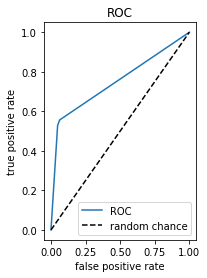

In [7]:
#模型效果可视化
names_list = ['age','gender','income','rfm_score']
color_list =['r','c','b','g']
plt.figure()
plt.subplot(1,2,1)
plt.plot(fpr,tpr,label='ROC')
plt.plot([0,1],[0,1],linestyle='--',color='k', label='random chance')
plt.title('ROC')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc=0)

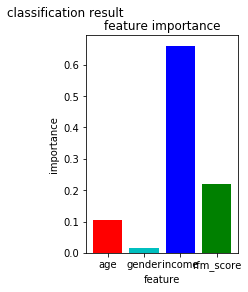

In [8]:
#子网格2：指标重要性
feature_importance = model_tree.feature_importances_
plt.subplot(1,2,2)
plt.bar(np.arange(feature_importance.shape[0]),feature_importance, tick_label=names_list, color=color_list)
plt.title('feature importance')
plt.xlabel('feature')
plt.ylabel('importance')
plt.suptitle('classification result')
plt.show()

In [14]:
#保存决策树规则图为PDF文件
dot_data = tree.export_graphviz(model_tree,out_file=None, max_depth=5, feature_names=names_list, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data) #通过pydotplus将决策规则解析为图形
graph.write_pdf('tree.pdf')

True

In [19]:
X_new = [[40,0,55616,0],[17,0,55568,0],[55,1,55932,1]]
print('classification prediction')
for i, data in enumerate(X_new):
    y_pre_new = model_tree.predict([data])
    print('classification for %d record is: %d' % (i + 1,y_pre_new))

classification prediction
classification for 1 record is: 0
classification for 2 record is: 0
classification for 3 record is: 1
